In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [3]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')
# Let's check out the first three rows
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Preprocessing 

#drop the columns that won't be used
df = df.drop(['Name', 'Ticket' , 'Cabin','PassengerId'], axis=1)

# Fill the missing values in 'Age' with the median age and 'Embarked' with the "most common value" or mode
df['Age']= df['Age'].fillna(df['Age'].median())
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0]) ### NOT DELETING THIS TIME

# 'Sex' and 'Embarked' are categorical features, we will "One Hot Encode" these 
encoder = OneHotEncoder(sparse=False, drop='first')

# Transform the 'Sex' and 'Embarked' columns
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Sex', 'Embarked']]),
                          columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)

# drop the original 'Sex' and 'Embarked' columns
df.drop(['Sex','Embarked'], axis=1, inplace=True)

In [6]:
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0


In [6]:
X= df.drop(['Survived'], axis =1)
y= df['Survived']

# train test 
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2, random_state=42)

In [7]:
# Decision Tree model 🌲
dt =  DecisionTreeClassifier(random_state =42,max_depth =3,criterion ='entropy' )

# Train the model 
dt.fit(X_train,y_train)

# Predict the test set results 
y_pred = dt.predict(X_test)

In [9]:
# Let's evaluate the model
print(accuracy_score (y_test, y_pred))
# Print the confusion matrix
print(confusion_matrix (y_test, y_pred))

0.7988826815642458
[[92 13]
 [23 51]]


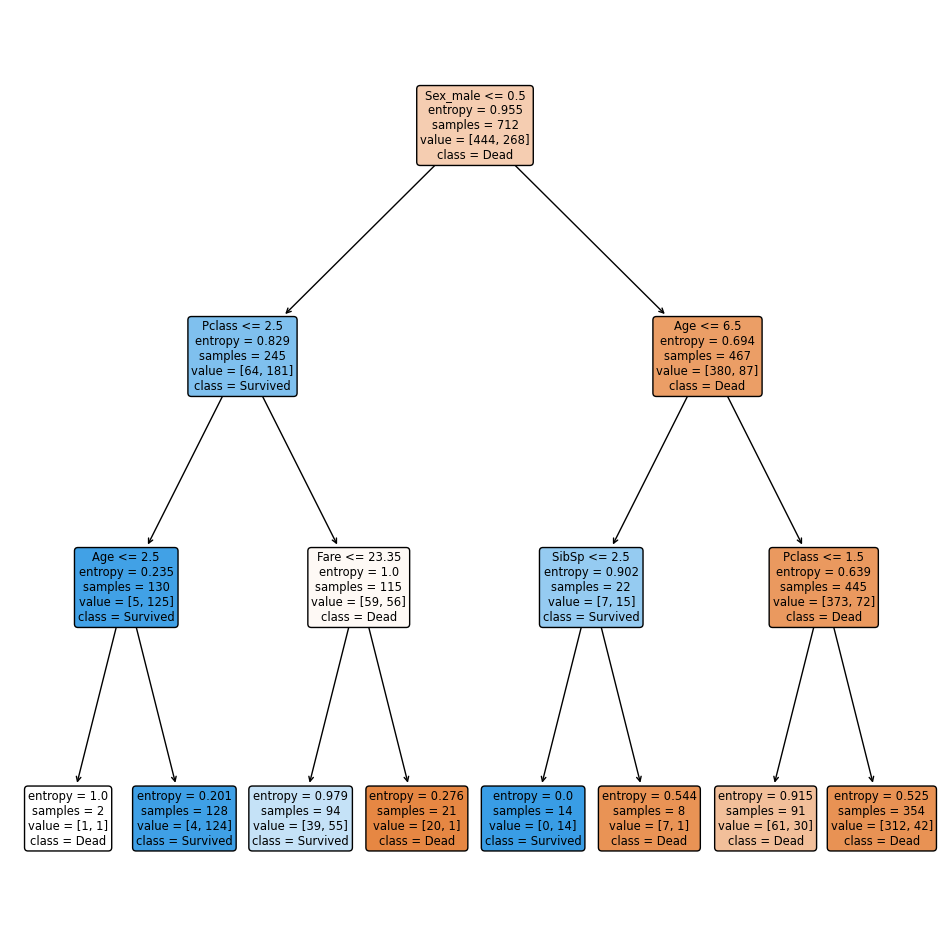

In [10]:
# Plot the decision tree
plt.figure(figsize =(12,12))
plot_tree(dt,filled=True,rounded=True,
         class_names = ['Dead', 'Survived'], feature_names = X.columns)
plt.show()

In [11]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [9]:
 print(export_text(dt, feature_names =list(X.columns)))

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- Fare >  23.35
|   |   |   |--- class: 0
|--- Sex_male >  0.50
|   |--- Age <= 6.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0



In [ ]:
dt.get_depth()

In [ ]:
dt.feature_importances_

In [ ]:
X.columns

In [ ]:
pd.DataFrame({'Features':X.columns,'importances':dt.feature_importances_ }).sort_values(['importances'], ascending= False)